# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.

### YOUR CODE HERE ### 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
import statsmodels.api as sm

import eda_functions as eda

import warnings
warnings.filterwarnings('ignore')

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [2]:
# Import the statsmodel module.
import statsmodels.api as sm
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols
### YOUR CODE HERE ###

### Load the dataset

`Pandas` was used to load the provided dataset `modified_marketing_and_sales_data.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
path = '/home/gato/Scripts/DS/RegressionAnalysis/modified_marketing_and_sales_data.csv'
### YOUR CODE HERE ###
data = pd.read_csv(path)

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

There are multiple reasons for using exploratory data analysis. some of them are understanding data types, counts, features, ranges, measurements of central tendency, measurements of dispersion, measurements of location, empirical rule, distribution thru graphs. We do EDA because if we would like to make inferences. Statistical inferences can be made if we practice EDA with the help of the PACE (plan, analyze, construct, and execute) Also models only use numbers that are ideally normally distributed. And ideally our data can get to be that.

### Explore the data size

Calculate the number of rows and columns in the data.

In [4]:
# Display the shape of the data as a tuple (rows, columns).

### YOUR CODE HERE ### 
data.shape

(4572, 4)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is an attribute of a pandas DataFrame that returns the dimension of the DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `shape` attribute of a DataFrame returns a tuple with the array dimensions.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.shape`, which returns a tuple with the number of rows and columns.

</details>

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

### YOUR CODE HERE ###
data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


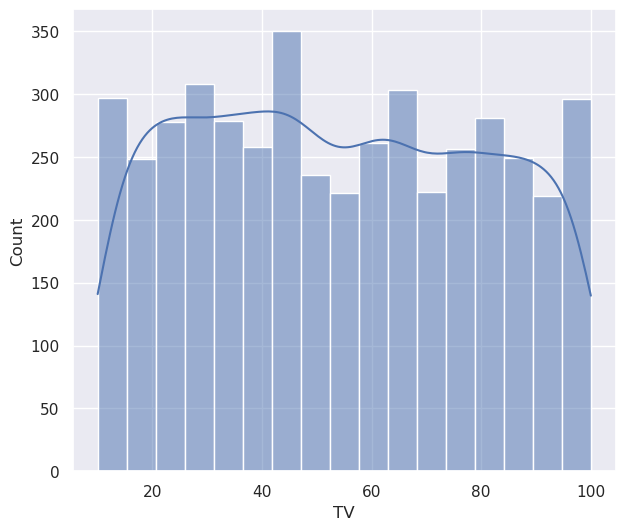

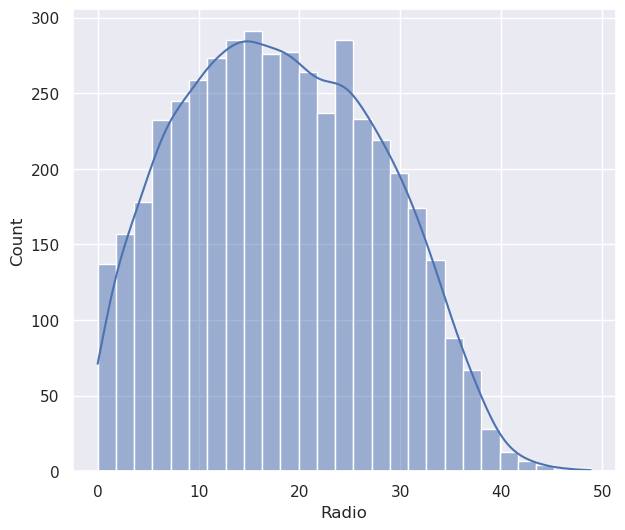

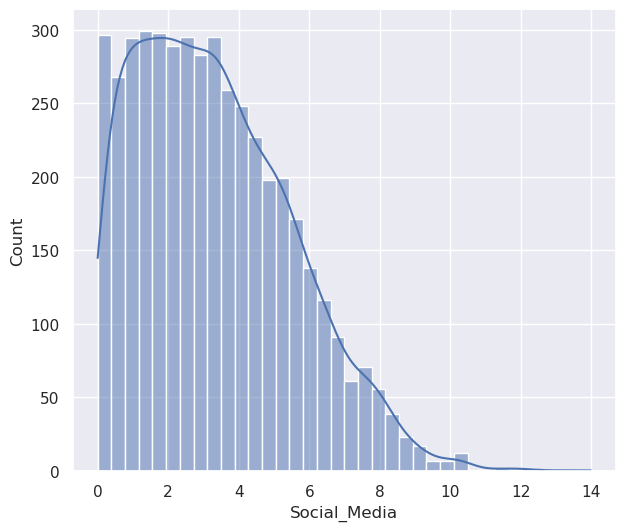

In [6]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.histplot(data['TV'], kde=True)

fig, ax = plt.subplots(figsize=(7,6))
ax = sns.histplot(data['Radio'], kde=True)


fig, ax = plt.subplots(figsize=(7,6))
ax = sns.histplot(data['Social_Media'], kde=True)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Subset `data` to only include the columns of interest.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Select the columns of interest using `data[['TV','Radio','Social_Media']]`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `describe()` to the data subset.

</details>

### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [7]:
# Calculate the average missing rate in the sales column.

### YOUR CODE HERE ###

def miss_df(dataframe: pd.DataFrame):
    """
    Take a pandas df as argument, returns another one
    with  basic information about missing data
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    
    df = dataframe
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (df.isnull().sum()/df.isnull().count())\
    .sort_values(ascending=False)
    missing_data = pd.concat([total_missing, round(percent_missing * 100, 2)], axis=1, \
                             keys=['Total', 'Percent'])
    return(missing_data.head(len(df.columns)))

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.

### YOUR CODE HERE ###

#round(missing_sales, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

### YOUR CODE HERE ###
miss_df(data)

,Total,Percent
TV,10,0.22
Social_Media,6,0.13
Sales,6,0.13
Radio,4,0.09


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

I obvserve it as being an small percentage 0.2% or 10 missing values from 4572.

### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [8]:
# Subset the data to include rows where Sales is present.

### YOUR CODE HERE ### 
data.dropna(inplace=True)
miss_df(data)

,Total,Percent
TV,0,0.0
Radio,0,0.0
Social_Media,0,0.0
Sales,0,0.0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about removing missing values from a DataFrame](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/rUXcJ/work-with-missing-data-in-a-python-notebook).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function may be helpful.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `dropna()` to `data` and use the `subset` and `axis` arguments to drop rows where `Sales` is missing. 

</details>


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

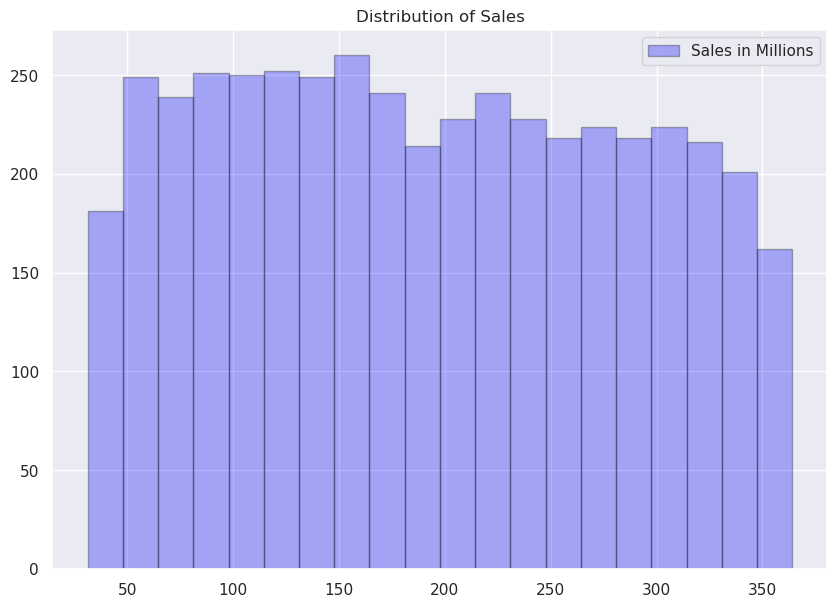

In [9]:
# Create a histogram of the Sales.

### YOUR CODE HERE ### 

# Add a title
# hist of the sales
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(data['Sales'], bins=20, color='Blue', edgecolor='black', label='Sales in Millions', alpha=0.3)
ax.set_title('Distribution of Sales')
ax.legend();


In [10]:
def empirical(df, col):
    """
    Recieve a dataframe and a column.
    Return a data frame with information related
    to the empirical rule compared to a column
    distribution.
    
    Args:
        df(pd.DataFrame): a pandas DataFrame
        column: a pandas series
    """
    mean = df[col].mean()
    SD   = df[col].std()
    
    lowerLim = mean - 1 * SD
    upperLim = mean + 1 * SD

    pct1 = round(((df[col] >= lowerLim) & (df[col] <= upperLim)).mean(), 2)

    ## 2SD from the mean

    lowerLim2 = mean - 2 * SD
    upperLim2 = mean + 2 * SD

    pct2 = round(((df[col] >= lowerLim2) & (df[col] <= upperLim2)).mean(), 2)

    ## 3SD from the mean
    
    lowerLim3 = mean - 3 * SD
    upperLim3 = mean + 3 * SD

    pct3 = round(((df[col] >= lowerLim3) & (df[col] <= upperLim3)).mean(), 2)
    
    lims = [pct1, pct2, pct3]
    suggestion = [0.68, 0.95, 0.997]
    
    rules = [[ pct1, suggestion[0], abs(pct1 - suggestion[0]) ], 
             [ pct2, suggestion[1], abs(pct2 - suggestion[1]) ], 
             [ pct3, suggestion[2], abs(pct3 - suggestion[2]) ]]
    index = ["Frac of the values within +/- 1 SD from the mean", 
             "Frac of the values within +/- 2 SD from the mean", 
             "Frac of the values within +/- 3 SD from the mean"]
    df = pd.DataFrame(rules, columns = [col, 'empirical_rule_suggest', \
                                        'difference'], index = index)
    
    return(df)

In [11]:
empirical(data, 'Sales')

,Sales,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.58,0.680,0.100
Frac of the values within +/- 2 SD from the mean,1.00,0.950,0.050
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [12]:
data['Sales'].describe()

count    4546.000000
mean      192.413332
std        93.019873
min        31.199409
25%       112.434612
50%       188.963678
75%       272.324236
max       364.079751
Name: Sales, dtype: float64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a histogram.

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library and pass in the `Sales` column as the argument.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To get a specific column from a DataFrame, use a pair of single square brackets and place the name of the column, as a string, in the brackets. Be sure that the spelling, including case, matches the data exactly.

</details>


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

The count is 4546 examples, with a mean of around 192 Millions, the Standard Deviation is 93 millions, with a minimum amount of around 31 millions and on the high spectrum 364 millions.
The Data had missing information, but only under 1%. The samples with missing data were eliminated.
Visually the data does not look like a bell shape.             0  
The empirical rule does not satisfy the normal rule neither. \/|\/
                                                               |
                                                               /\

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

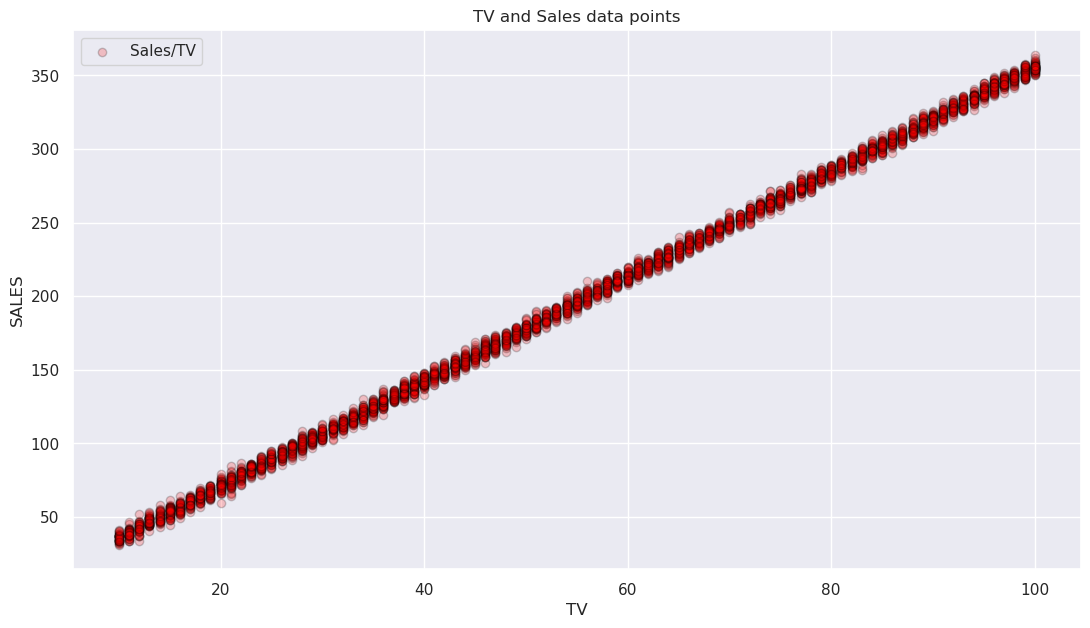

In [13]:
## TV and Sales seems to be 
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(data['TV'], data['Sales'], c='red', edgecolor='black', alpha=0.2, label= 'Sales/TV')
ax.set_title('TV and Sales data points')
ax.set_xlabel("TV")
ax.set_ylabel("SALES")
ax.legend();

In [14]:
## model1 'Social_Media'
X_s = data['Social_Media']
X_c_s = sm.add_constant(X_s)
y = data['Sales']
model1 = sm.OLS(y, X_c_s).fit()

In [15]:
## model2 'Radio'
X_r = data['Radio']
X_c_r = sm.add_constant(X_r)
y = data['Sales']
model2 = sm.OLS(y, X_c_r).fit()

In [16]:
## model3 'Tv'
X_tv = data['TV']
X_c_tv = sm.add_constant(X_tv)
y = data['Sales']
model3 = sm.OLS(y, X_c_tv).fit()

In [17]:
#print(model1.summary())

In [18]:
#print(model2.summary())

In [19]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:24:24   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.1

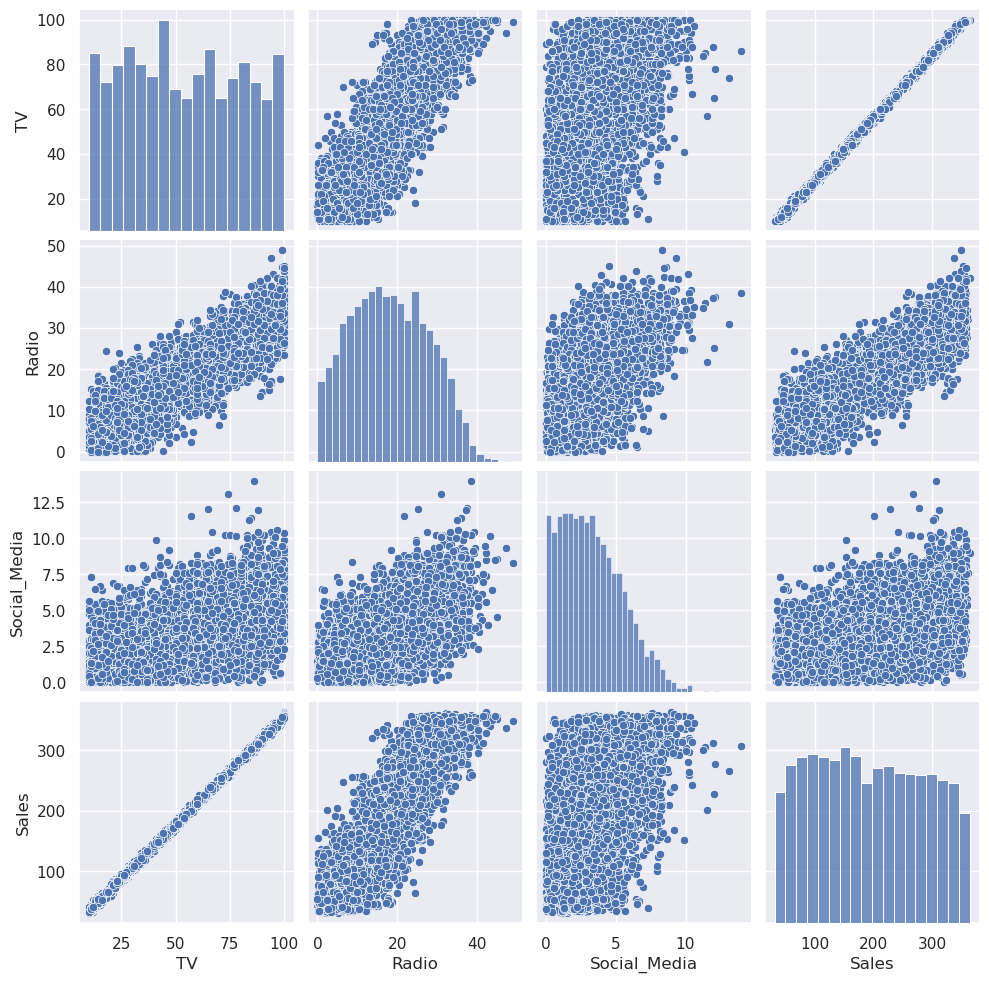

In [20]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/dnjWm/explore-linear-regression-with-python).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot that shows the relationships between variables in the data.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variable did you select for X? Why?

I belive that is TV. Since the evidence shown seems to be related linearly to sales. 
Radio some how follow the trend and the less trendy being social_media.

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [35]:
# Define the OLS formula.

### YOUR CODE HERE ### 


# Create an OLS model.

### YOUR CODE HERE ### 

# Fit the model.

### YOUR CODE HERE ### 

# Save the results summary.

### YOUR CODE HERE ### 

# Display the model results.

### YOUR CODE HERE ### 

## model3 'Tv'
X_tv = data['TV']
X_c_tv = sm.add_constant(X_tv)
y = data['Sales']
model3 = sm.OLS(y, X_c_tv).fit()

result = model3.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:33:38   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.1

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where an OLS model is defined and fit](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/Gi8Dl/ordinary-least-squares-estimation).

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`ols()`](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html) function imported earlier— which creates a model from a formula and DataFrame—to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Replace the `X` in `'Sales ~ X'` with the independent feature you determined has the strongest linear relationship with `Sales`. Be sure the string name for `X` exactly matches the column's name in `data`.

</details>

<details>
<summary><h4><strong>Hint 4</strong></h4></summary>

Obtain the model results summary using `model.summary()` and save it. Be sure to fit the model before saving the results summary. 

</details>

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

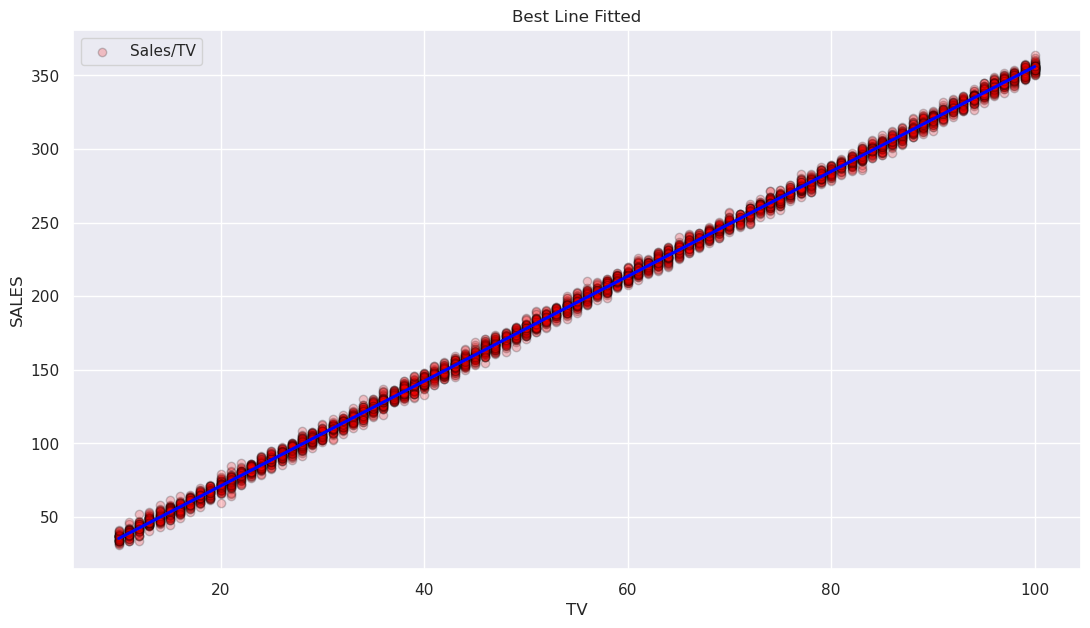

In [27]:
# Create a scatterplot comparing X and Sales (Y).

### YOUR CODE HERE ### 

fig2, ax2 = plt.subplots(figsize=(13, 7))
ax2.scatter(X_tv, y, c='red', edgecolor='black', alpha=0.2, label= 'Sales/TV')
sns.regplot(x=X_tv, y=y, data=data, scatter=False, ci=95, 
    fit_reg = True, color = 'blue')
ax2.set_title('Best Line Fitted')
ax2.set_xlabel("TV")
ax2.set_ylabel("SALES")
ax2.legend();

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Pass the X and Y variables you chose for your simple linear regression as the arguments for `x` and `y`, respectively, in the `scatterplot()` function.

</details>

**QUESTION:** Is the linearity assumption met?

So far so good.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

In [30]:
# Calculate the residuals.

### YOUR CODE HERE ### 
fitted_values = model3.predict(X_c_tv)
residuals = model3.resid
residuals_ = pd.DataFrame(residuals)

# Create a 1x2 plot figures.

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

# Set the x label of the residual plot.

# Set the title of the residual plot.

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

# Set the title of the Q-Q plot.

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.

# Show the plot.
print(eda.estadisticas(residuals_, residuals_.columns[0]))
eda.empirical(residuals_, residuals_.columns[0])

                         0
observations  4.546000e+03
minimun      -1.160621e+01
maximun       1.125665e+01
mean          8.477747e-15
variance      8.696094e+00
skewness     -1.465394e-03
kurtosis      1.247123e-02


,0,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.68,0.680,0.000
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


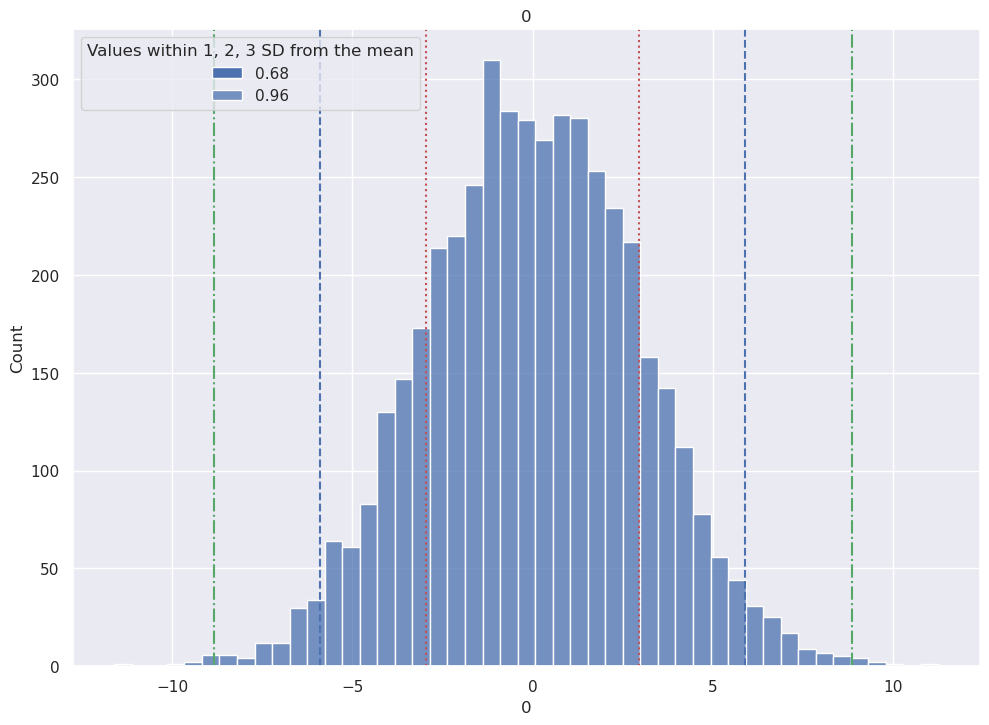

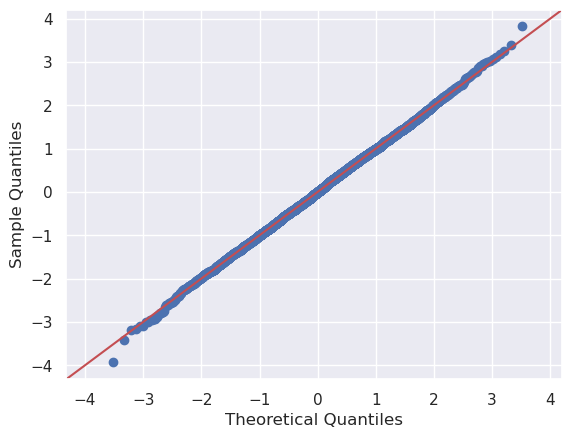

In [32]:
eda.distribution(residuals_, residuals_.columns[0])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` [`qqplot()`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function.

</details>

**Question:** Is the normality assumption met?

absolutamente, maravillosamente.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

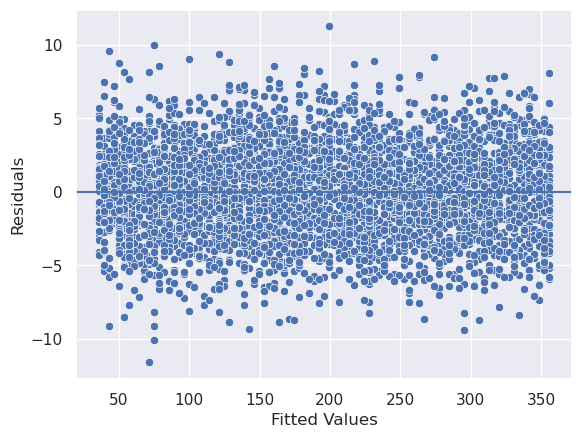

In [33]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

# Set the x-axis label.

# Set the y-axis label.

# Set the title.

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

# Show the plot.

fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the `model` object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to the figure using the `axline()` function.

</details>

**QUESTION:** Is the homoscedasticity assumption met?

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [37]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:33:38   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.188      -0.330       0.065
TV             3.5615      0.002   2125.272      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.031
Skew:                          -0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


R squared is the addition of the square of the difference between the observed value and predicted.
is squared so is not negative, as could misslead us thinking that is less that it should be.
This loss functions help us to determinate best fitting line. We are trying to minimize this distance, adjusting the slope.

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

`y = mx + i`

m = `slope` = 3.5615

i = `intercept` = -0.1325


sales = 3.56 * TVmillions - 0.1325


**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?



sales = 3.56 * TVmillions - 0.1325

**Question:** Why is it important to interpret the beta coefficients?

So we can use our newlly function properlly without being missleaded.

**Question:** Why is it important to interpret the beta coefficients?

**Question:** Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [39]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:33:38   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.188      -0.330       0.065
TV             3.5615      0.002   2125.272      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.031
Skew:                          -0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

**`std err`** : the accuracy of prediction for each **beta**, the lower the better.

**`t-stats & Pval`** : Hypotesis Beta equal 0, if the coef. = 0 means that there is no significant difference statistically speaking.
in the Intercept is not 0


**Question:** Based on this model, what are you interested in exploring?

I was interested in the other variables and its relationship.

**Question:** What recommendations would you make to the leadership at your organization?

I would recommend to investigate what percentage of a campaing invested in different areas.


## Considerations

**What are some key takeaways that you learned from this lab?**

Finding normality is not normal.

**What findings would you share with others?**

3.5615 of TV explain the Sales, but also the other campaing are important.

**How would you frame your findings to stakeholders?**

I would explain how is the one that we can be more sure to have expected results.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 